In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from functools import partial
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [2]:
# define functions
def total_bases(row):
    singles = row.H - row["2B"] - row["3B"] - row["HR"]
    total_bases = singles + row["2B"] * 2 + row["3B"] + row["HR"]
    return total_bases

def ab_per_so(row):
    try:
        return row["Cumulative AB"] / row["Cumulative SO"]
    except:
        return 0

In [3]:
# define functions
def get_batter_log(player_id,year,player_name=None):
    to_num = partial(pd.to_numeric, errors="ignore")
    df = pd.read_html(f"https://widgets.sports-reference.com/wg.fcgi?css=1&site=br&url=%2Fplayers%2Fgl.fcgi%3Fid%3D{player_id}%26t%3Db%26year%3D{year}&div=div_batting_gamelogs")[0]\
        .query("Tm != 'Tm'")
    df["year"] = year
    df["player_id"] = player_id
    df["player_name"] = player_name
    df = df.dropna(subset=["Tm"])
    df = df.apply(to_num)
    return df

def plot_compare_stat(df1, df2, stat):
    fig = plt.figure(figsize=(19,12))
    player_names = []

    for df in [df1, df2]:
        df = df[df["Cumulative PA"] > 100]
        player_name = df.player_name.unique()[0]
        player_names.append(player_name)
        plt.plot(df["Cumulative PA"],df[stat], label=player_name, linewidth=10)

    title = "{} vs {} - {} - 2019 Season".format(player_names[0], player_names[1], stat)
    plt.title(title, size=20)
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    plt.gca().tick_params(axis='both', which='major', labelsize=20)
    plt.ylabel(stat, fontdict=dict(size=20))
    plt.xlabel("Plate Appearance on the Season", fontdict=dict(size=20))
    plt.xlim(20,)
    plt.grid(b=True, which='major', color='#666666', linestyle='-',axis='x')
    plt.tight_layout()
    plt.legend(fontsize='xx-large')
    plt.savefig("{}.jpg".format(title))
    plt.show()

def add_cum_stats(df):
    df = df.copy()
    df["Cumulative HR"] = df.groupby("year").HR.cumsum()
    df["tb"] = df.apply(total_bases, axis=1)
    df["Cumulative TB"] = df.groupby("year").tb.cumsum()
    df["Cumulative H"] = df.groupby("year").H.cumsum()
    df["Cumulative SO"] = df.groupby("year").SO.cumsum()
    df["Cumulative BB"] = df.groupby("year").BB.cumsum()
    df["Cumulative AB"] = df.groupby("year").AB.cumsum()
    df["Cumulative PA"] = df.groupby("year").PA.cumsum()
    df["ABs per Strikeout"] = df.apply(ab_per_so, axis=1)
    df["Walk per Strike Out Ratio"] = df["Cumulative BB"]/df["Cumulative SO"]
    return df



In [4]:
#define constants
player_ids = ["phamth01", "renfrhu01"]

In [5]:
#get data
tommy = add_cum_stats(get_batter_log(player_ids[0],2019,player_name="Tommy Pham"))
hunter = add_cum_stats(get_batter_log(player_ids[1],2019, player_name="Hunter Renfroe"))

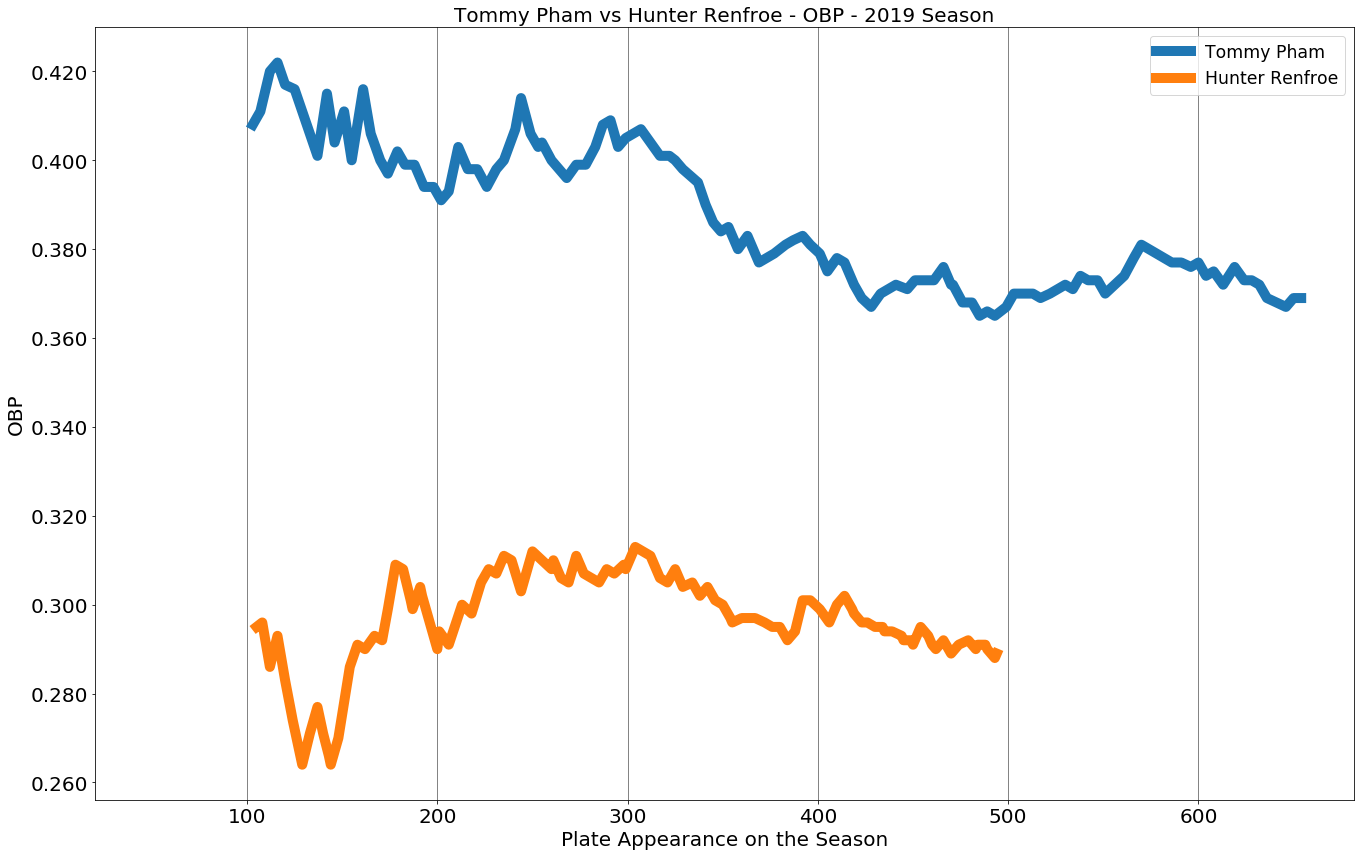

In [6]:
plot_compare_stat(tommy,hunter,"OBP")

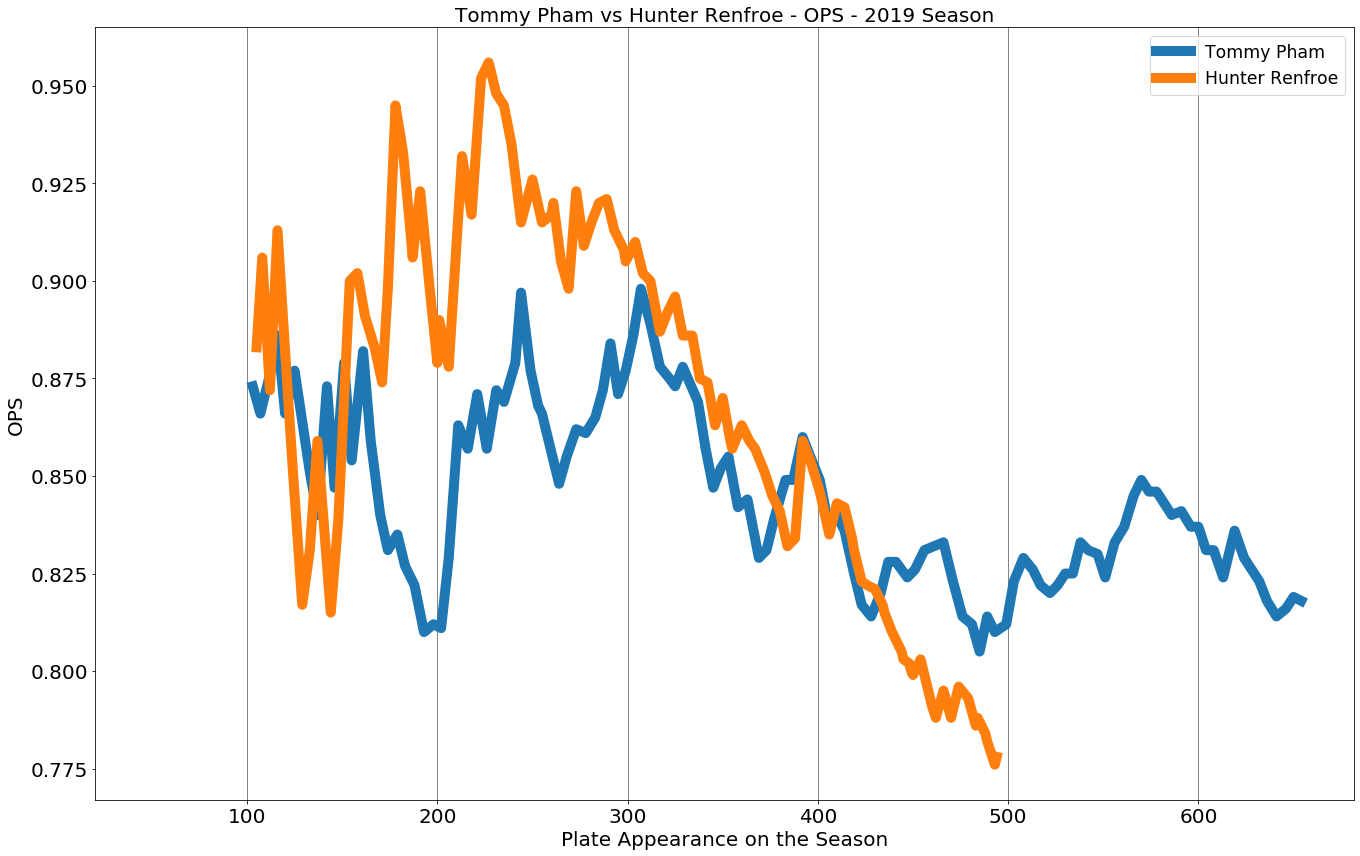

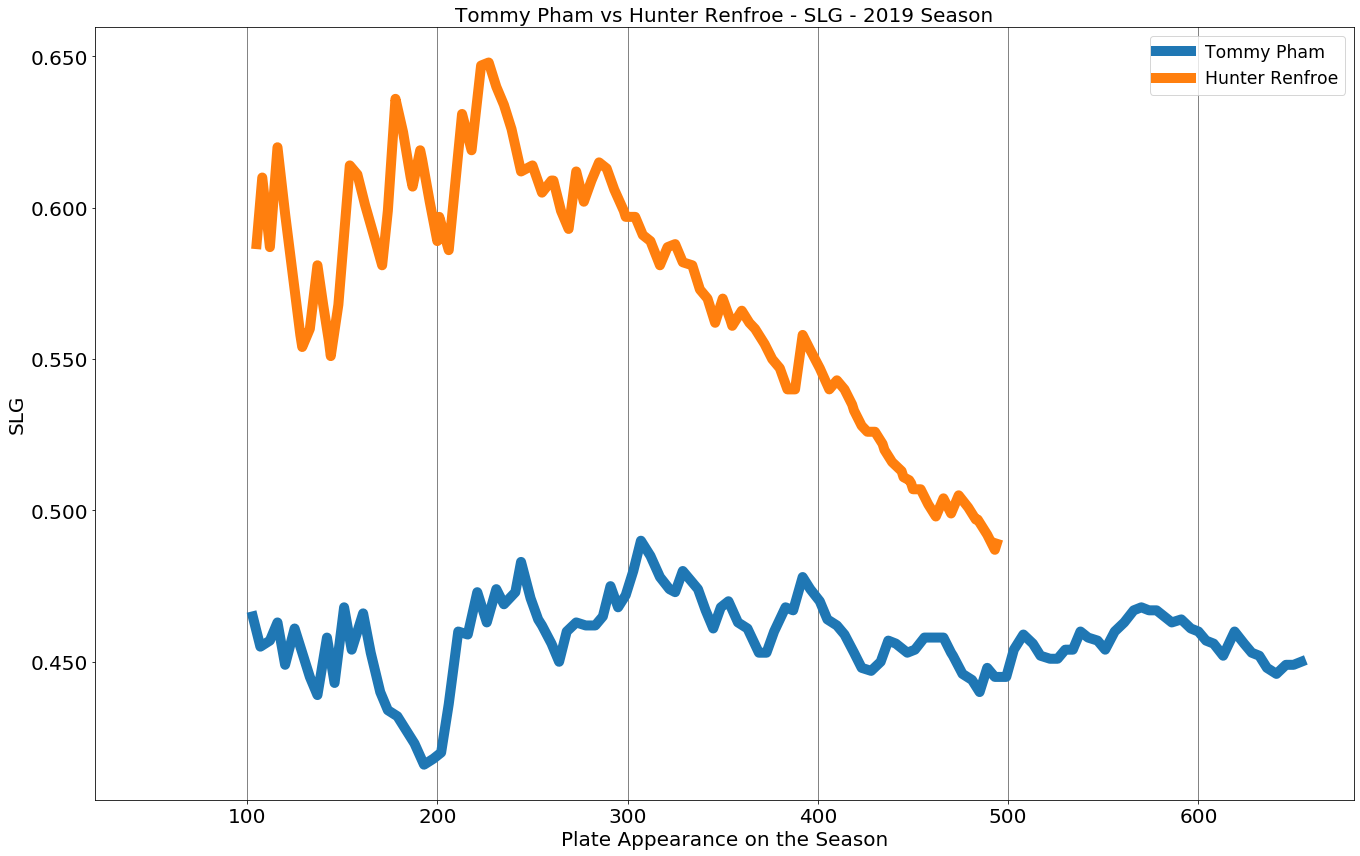

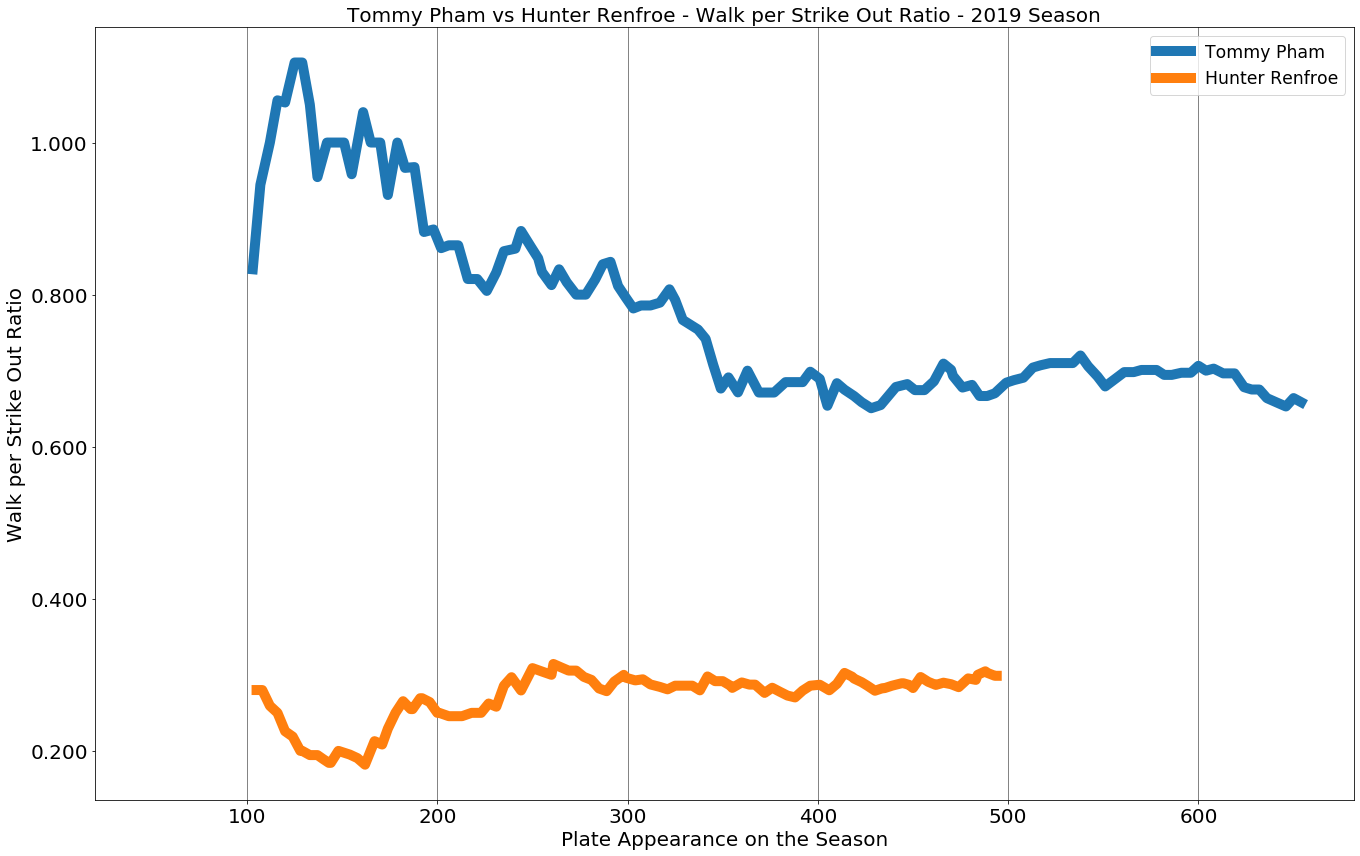

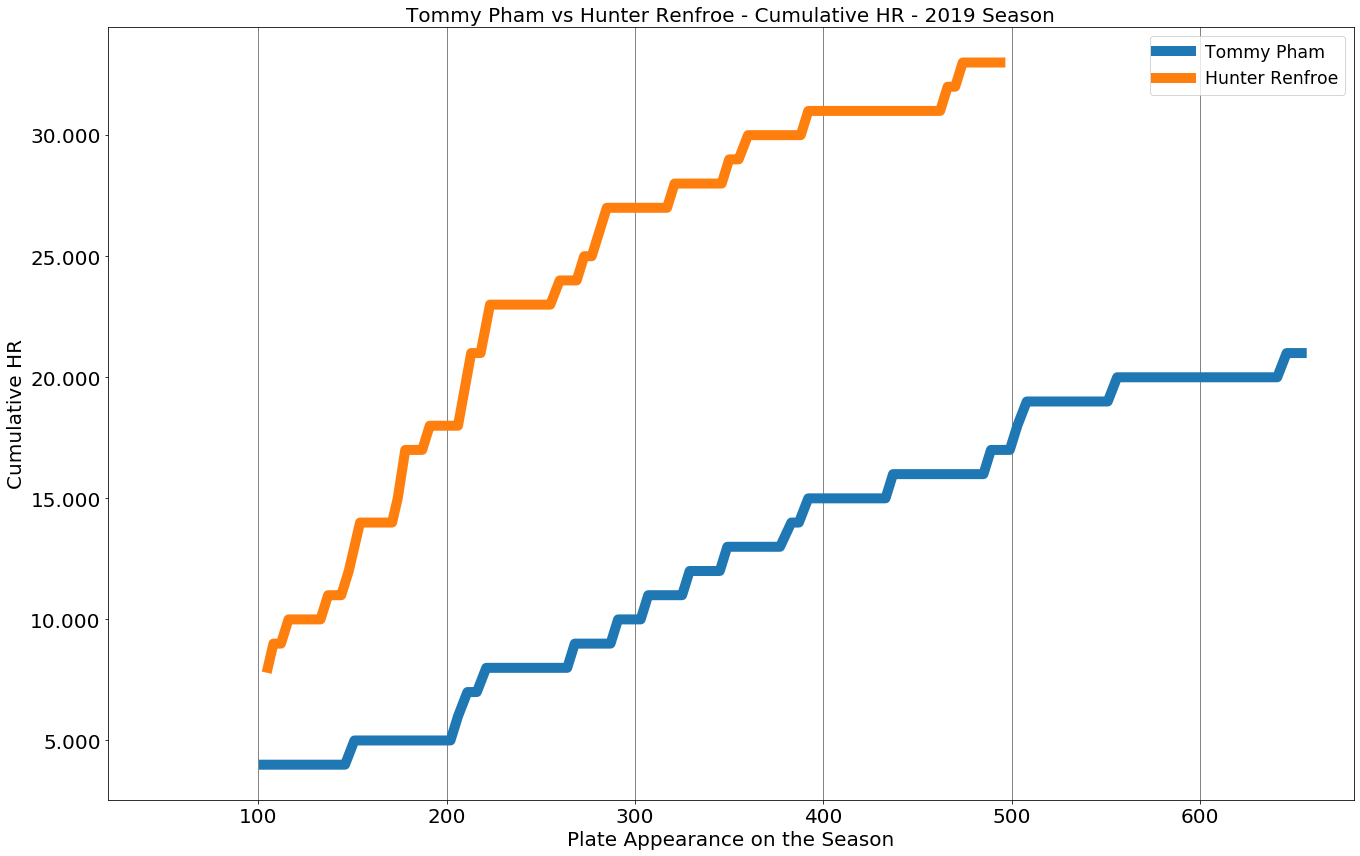

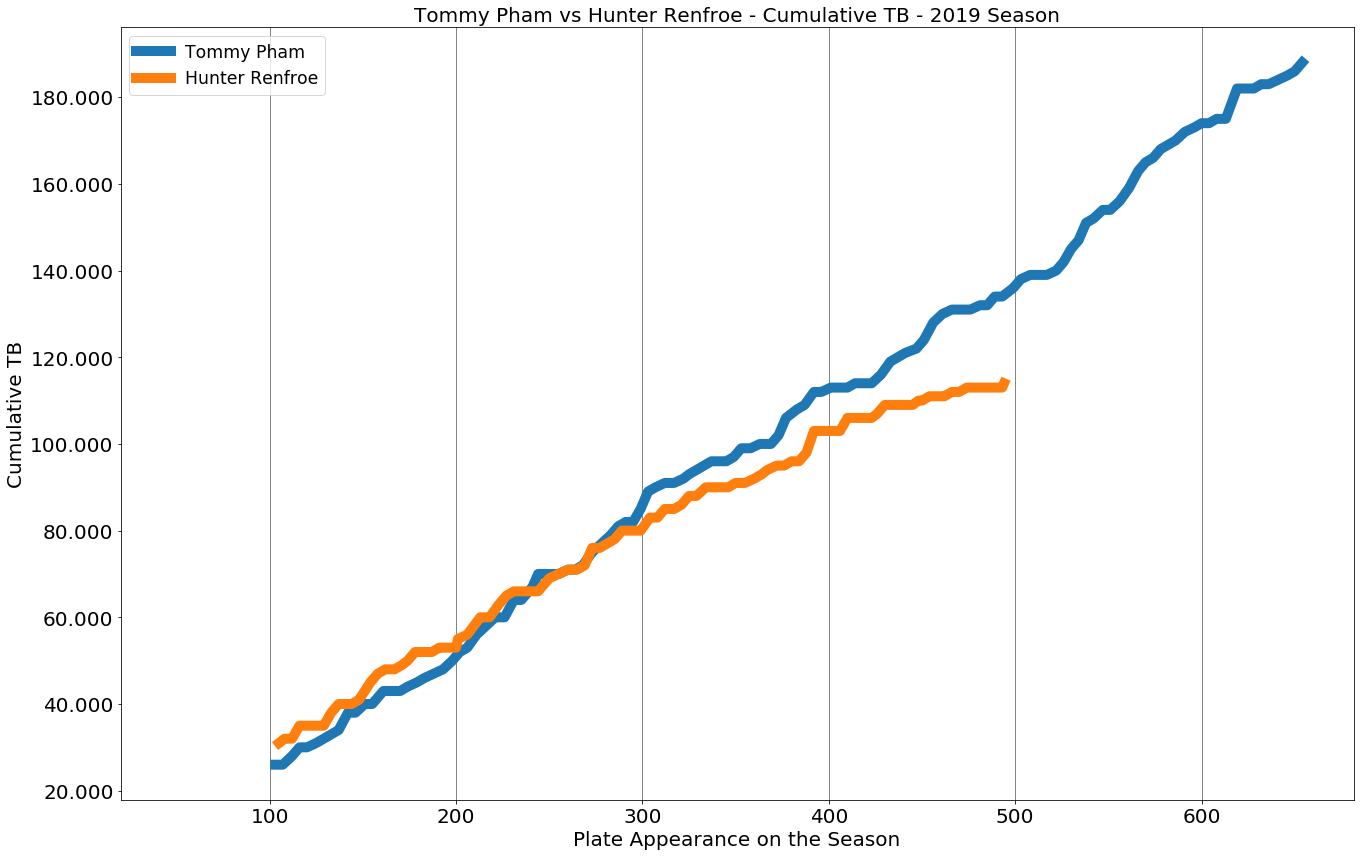

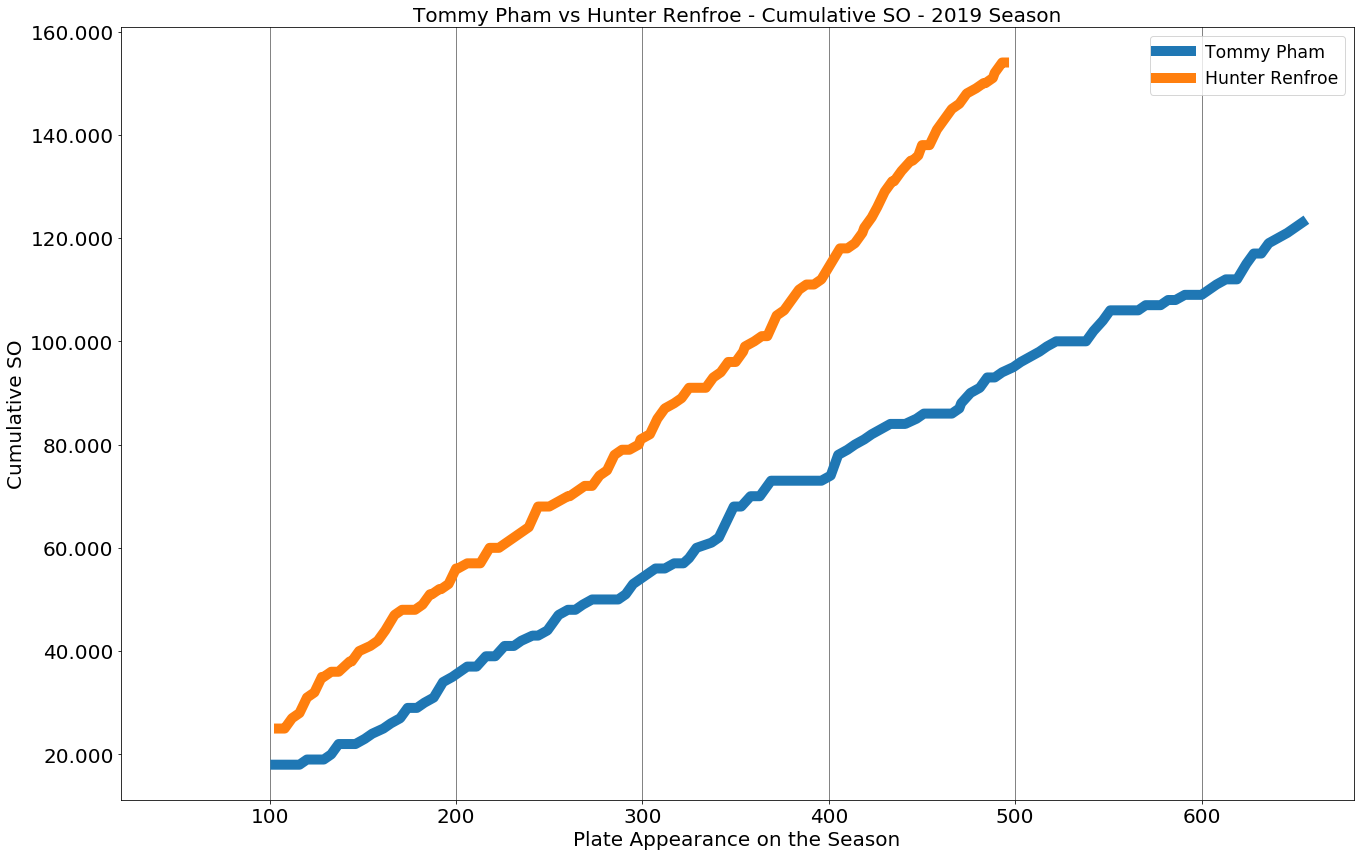

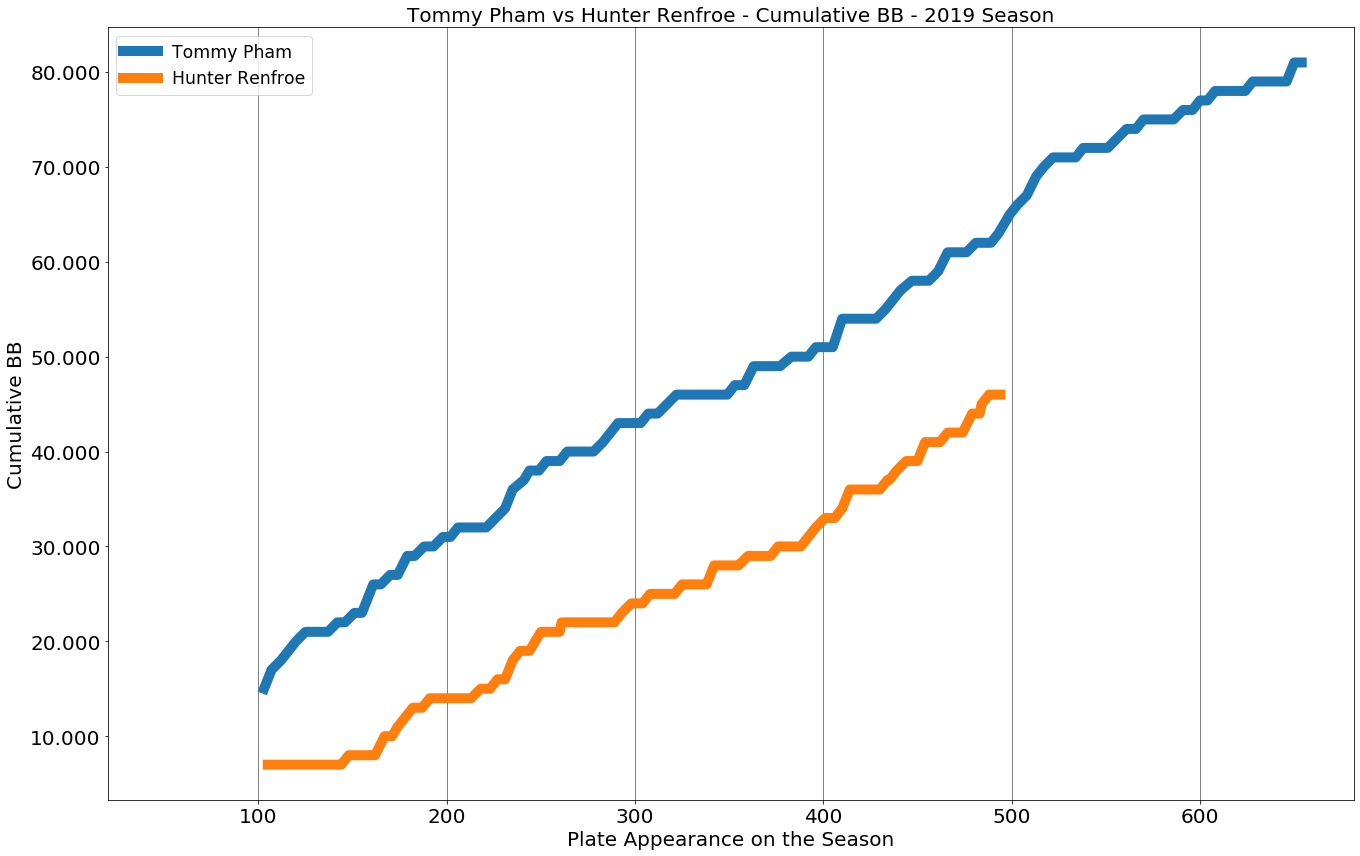

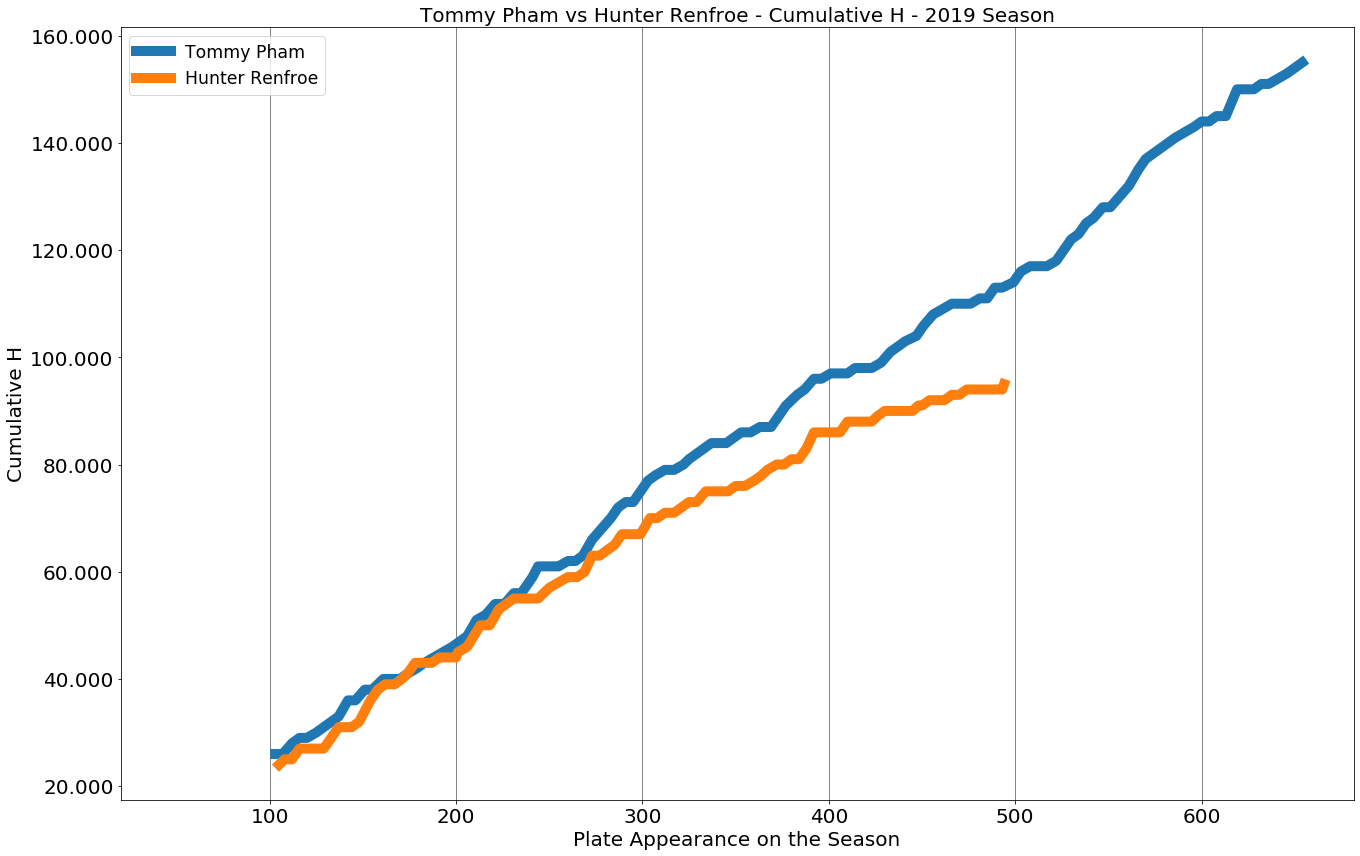

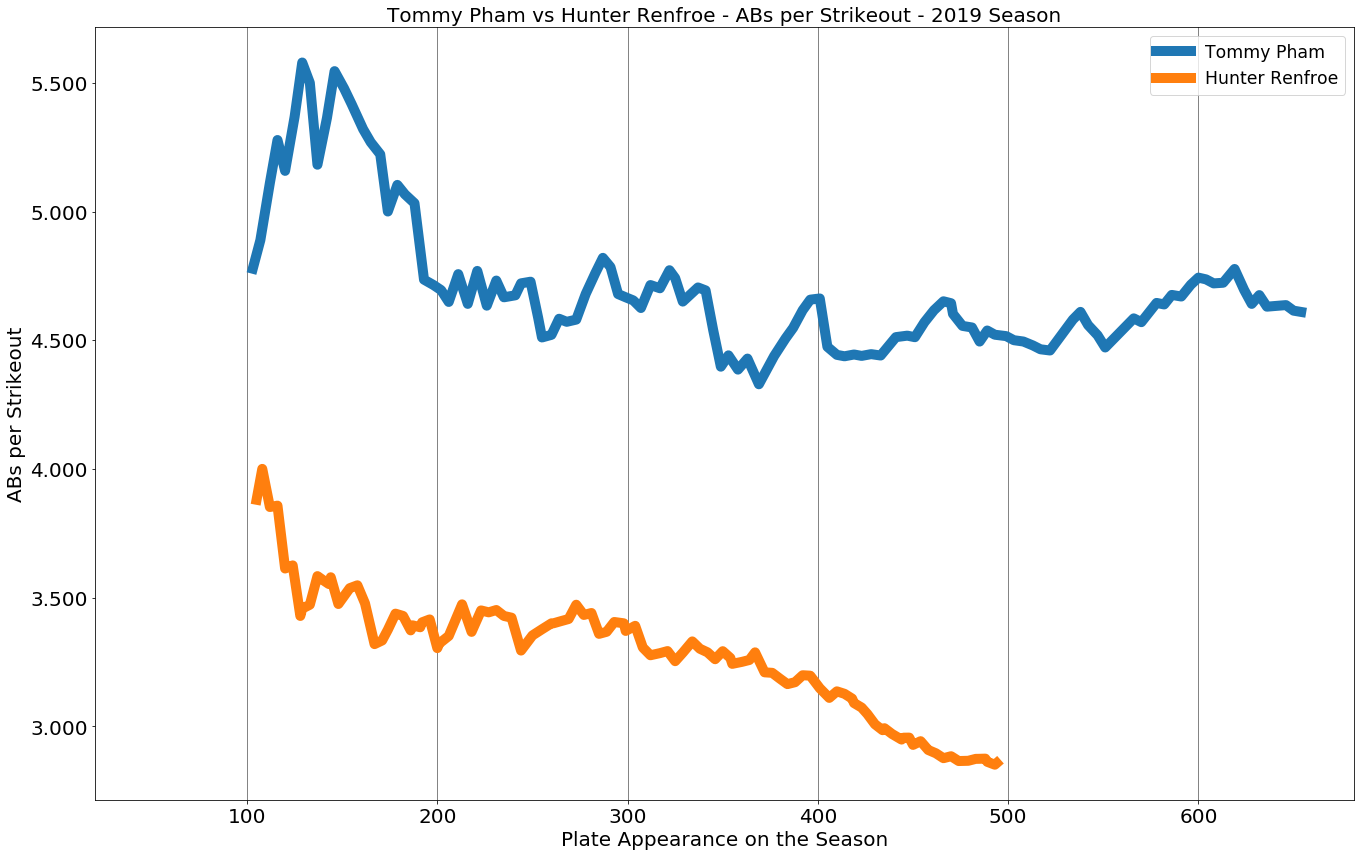

In [7]:
stats_to_compare = ["OPS", "SLG", "Walk per Strike Out Ratio", "Cumulative HR", "Cumulative TB","Cumulative SO", "Cumulative BB", "Cumulative H", "ABs per Strikeout"]

for stat in stats_to_compare:
    plot_compare_stat(tommy, hunter, stat)

In [8]:
first_400PAs = pd.concat([ add_cum_stats(df[df["Cumulative PA"] < 400]) for df in [tommy, hunter]])

In [9]:
first_400PAs.sort_values("Cumulative PA").tail()

,Rk,Gcar,Gtm,Date,Tm,Unnamed: 5,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,RE24,DFS(DK),DFS(FD),Pos,year,player_id,player_name,Cumulative HR,tb,Cumulative TB,Cumulative H,Cumulative SO,Cumulative BB,Cumulative AB,Cumulative PA,ABs per Strikeout,Walk per Strike Out Ratio
109,106,356,115,Aug 9,SDP,NaN,COL,"W,7-1",CG,4,4,0,2,0,0,0,0,0,0.0,1,0,0,0.0,0,0.0,0,0,0.236,0.294,0.540,0.834,4,0.49,0.046,0.79,6.0,6.0,RF,2019,renfrhu01,Hunter Renfroe,30,2,98,83,111,30,352,388,3.171171,0.270270
110,107,357,116,Aug 10,SDP,NaN,COL,"W,8-5",CG,4,3,4,3,2,0,1,2,1,0.0,0,0,0,0.0,0,0.0,0,0,0.242,0.301,0.558,0.859,5,1.35,0.370,2.97,34.0,46.8,RF,2019,renfrhu01,Hunter Renfroe,31,5,103,86,111,31,355,392,3.198198,0.279279
88,86,487,94,Jul 13 (2),TBR,@,BAL,"W,12-4",CG,5,5,1,2,1,0,1,2,0,0.0,0,0,0,0.0,0,0.0,0,0,0.285,0.383,0.478,0.860,2,0.38,0.030,1.03,21.0,28.2,LF,2019,phamth01,Tommy Pham,15,3,112,96,73,50,337,392,4.616438,0.684932
89,87,488,95,Jul 14,TBR,@,BAL,"W,4-1",CG,4,3,0,0,0,0,0,0,1,0.0,0,0,0,0.0,0,0.0,0,0,0.282,0.381,0.474,0.855,2,0.55,-0.049,-0.42,2.0,3.0,LF,2019,phamth01,Tommy Pham,15,0,112,96,73,51,340,396,4.657534,0.698630
111,108,358,117,Aug 11,SDP,NaN,COL,"L,3-8",CG,4,3,1,0,0,0,0,0,1,0.0,1,0,0,0.0,0,0.0,0,0,0.240,0.301,0.553,0.854,5,0.99,0.002,-0.51,4.0,6.2,RF,2019,renfrhu01,Hunter Renfroe,31,0,103,86,112,32,358,396,3.196429,0.285714
